In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
sns.set_theme()

In [2]:
file_path = "weather2.csv"
df = pd.read_csv(file_path, index_col='Date')
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Intro

#### Subject matter

Predict rain of the next day based on weather conditions of the current day.

##### Breakdown of features and their types

Date
YYYY-MM-DD
The date of observation

Location
Categroical
The common name of the location of the weather station

MinTemp
continuous
The minimum temperature in degrees celsius


MaxTemp
continuous
The maximum temperature in degrees celsius


Rainfall
continuous
The amount of rainfall recorded for the day in mm


Evaporation
continuous
The so-called Class A pan evaporation (mm) in the 24 hours to 9am


Sunshine
continuous
The number of hours of bright sunshine in the day.


WindGustDir
categorical
The direction of the strongest wind gust in the 24 hours to midnight


WindGustSpeed
continuous
The speed (km/h) of the strongest wind gust in the 24 hours to midnight


WindDir9am
categorical
Direction of the wind at 9am


WindDir3pm
categorical
Direction of the wind at 3pm


WindSpeed9am
continuous
Wind speed (km/hr) averaged over 10 minutes prior to 9am


WindSpeed3pm
continuous
Wind speed (km/hr) averaged over 10 minutes prior to 3pm


Humidity9am
continuous
Humidity (percent) at 9am


Humidity3pm
continuous
Humidity (percent) at 3pm


Pressure9am
continuous
Atmospheric pressure (hpa) reduced to mean sea level at 9am


Pressure3pm
continuous
Atmospheric pressure (hpa) reduced to mean sea level at 3pm


Cloud9am
continuous
Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.


Cloud3pm
continuous
Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values


Temp9am
continuous
Temperature (degrees C) at 9am

In [3]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 

#### Size of data set

In [5]:
print(f"dataframe shape {df.shape}")

dataframe shape (145460, 22)


In [6]:
print(f"number of rows {df.shape[0]}")

number of rows 145460


In [7]:
print(f"number of columns {df.shape[1]}")

number of columns 22


## Initial Data Analysis

#### Handle missing data

In [8]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
count=0
count = df.isnull().any(axis=1).sum()
percent_count = count/len(df)*100
print(f"Total number of rows with missing values is {count}")
print(f"{round(percent_count)} percent of the entire dataset are rows with missing values.")

Total number of rows with missing values is 89040
61 percent of the entire dataset are rows with missing values.


Replacing missing data with the most frequent values within each column.

The advantage is works well with categorical features and prevent data loss which results in deletion of rows or columns.

In [10]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(df)
cleaned_df = pd.DataFrame(imp_mean.transform(df), columns = df.columns, index=df.index)
cleaned_df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Convert categorical variable into label encoding to using the classification models.

In [11]:
le = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        cleaned_df[column] =le.fit_transform(cleaned_df[column])
    else:
        cleaned_df[column] =cleaned_df[column].astype('float')

normalization the data by using min max scaler to improve the models.

In [12]:
scaler = MinMaxScaler()
for column in df.columns:
    if df[column].dtype == 'float':
        cleaned_df[column] =scaler.fit_transform(cleaned_df[[column]])

remove outliers to improve the models.

In [13]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [14]:
for column in df.columns:
    if df[column].dtype == 'float':
        cleaned_df = remove_outlier(cleaned_df,column)

In [15]:
cleaned_df.shape

(89142, 22)

#### Feature statistical analysis

In [16]:
cleaned_df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,...,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000,89142.000000
mean,23.665388,0.473402,0.533991,0.000274,0.030127,0.265063,7.845707,0.236783,6.800879,7.466346,...,0.684134,0.491131,0.631830,0.626028,0.595532,0.607263,0.584167,0.524969,0.023984,0.147293
std,14.251008,0.143309,0.114839,0.000723,0.010094,0.324869,4.707709,0.075850,4.484005,4.508293,...,0.167055,0.178055,0.092792,0.089014,0.288991,0.272579,0.103370,0.112119,0.153001,0.354400
min,0.000000,0.061321,0.147448,0.000000,0.008966,0.000000,0.000000,0.054264,0.000000,0.000000,...,0.230000,0.010000,0.391736,0.393600,0.000000,0.000000,0.293594,0.211132,0.000000,0.000000
25%,11.000000,0.370283,0.449905,0.000000,0.027586,0.000000,4.000000,0.186047,3.000000,4.000000,...,0.570000,0.360000,0.578512,0.569600,0.333333,0.444444,0.510676,0.445298,0.000000,0.000000
50%,24.000000,0.466981,0.525520,0.000000,0.027586,0.000000,8.000000,0.224806,6.000000,8.000000,...,0.680000,0.500000,0.618182,0.611200,0.777778,0.777778,0.583630,0.514395,0.000000,0.000000
75%,36.000000,0.573113,0.614367,0.000000,0.031724,0.613793,12.000000,0.286822,10.000000,11.000000,...,0.800000,0.610000,0.695868,0.684800,0.777778,0.777778,0.656584,0.600768,0.000000,0.000000
max,48.000000,0.912736,0.899811,0.003774,0.058621,0.986207,15.000000,0.441860,15.000000,15.000000,...,1.000000,0.980000,0.880992,0.859200,1.000000,0.888889,0.873665,0.838772,1.000000,1.000000


add columns for year, month and day in month to improve model.

In [17]:
cleaned_df['Year'] = pd.to_datetime(cleaned_df.index).year
cleaned_df['Month'] = pd.to_datetime(cleaned_df.index).month
cleaned_df['DayInMonth'] = pd.to_datetime(cleaned_df.index).day

#### Summary of data fixes

Handle missing data.

Convert categorical variable into label encoding.

normalization the data by using min max scaler.

remove outliers.

add columns for year, month and day in month

In [18]:
cleaned_df.to_csv("cleaned_weather.csv")

## Exploratory Data Analysis

### Feature correlation

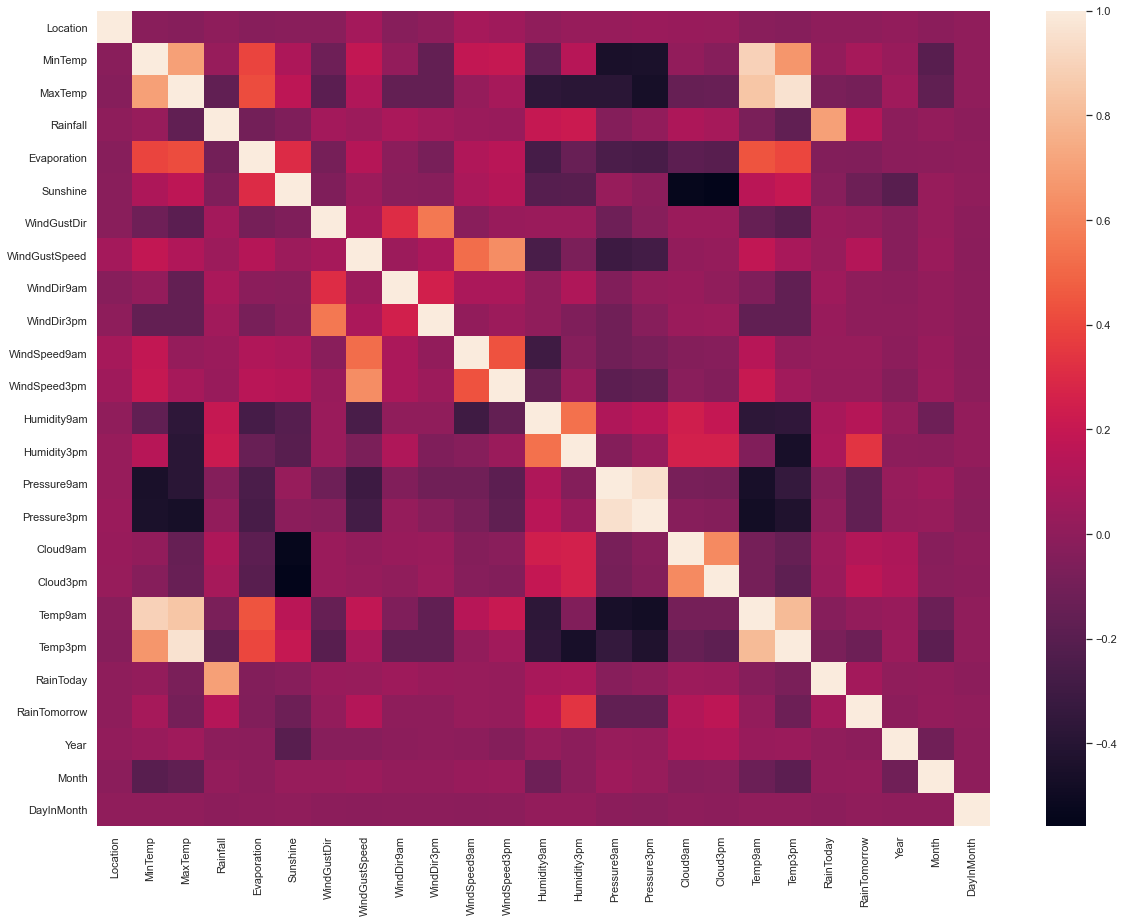

In [19]:
corr = cleaned_df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr)
plt.show()

### Analysis of each feature

In [20]:
for column in cleaned_df:
    print(f"{column} : {len(cleaned_df[column].unique())} unique values")

Location : 49 unique values
MinTemp : 354 unique values
MaxTemp : 375 unique values
Rainfall : 15 unique values
Evaporation : 73 unique values
Sunshine : 143 unique values
WindGustDir : 16 unique values
WindGustSpeed : 28 unique values
WindDir9am : 16 unique values
WindDir3pm : 16 unique values
WindSpeed9am : 20 unique values
WindSpeed3pm : 21 unique values
Humidity9am : 78 unique values
Humidity3pm : 97 unique values
Pressure9am : 297 unique values
Pressure3pm : 293 unique values
Cloud9am : 10 unique values
Cloud3pm : 9 unique values
Temp9am : 327 unique values
Temp3pm : 328 unique values
RainToday : 2 unique values
RainTomorrow : 2 unique values
Year : 11 unique values
Month : 12 unique values
DayInMonth : 31 unique values


### Visualization for relevant and interesting features

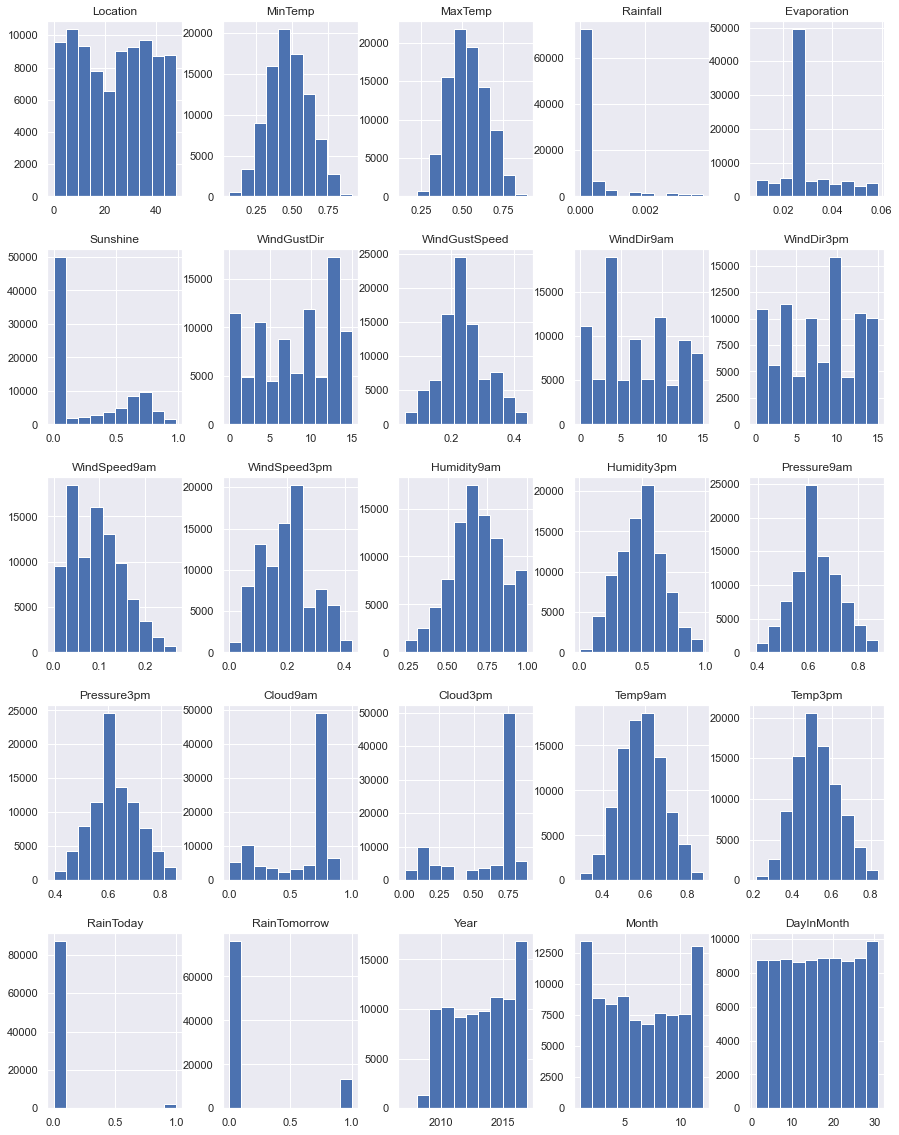

In [21]:
hist = cleaned_df.hist(bins=10,figsize=(15,20))

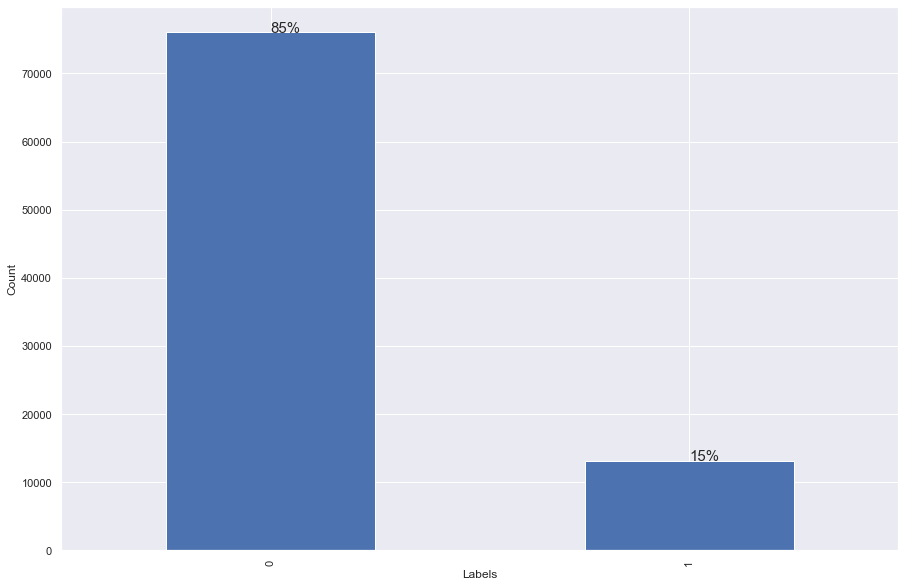

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
cleaned_df['RainTomorrow'].value_counts().plot(kind='bar');
for p in ax.patches:
    ax.annotate(str(round(p.get_height()/len(cleaned_df)*100))+'%', (p.get_x() + 0.25, p.get_height()), size=15)
ax.set_ylabel("Value Counts Target Variable RainTomorrow")
ax.set_xlabel("Labels")
ax.set_ylabel("Count")
plt.show()

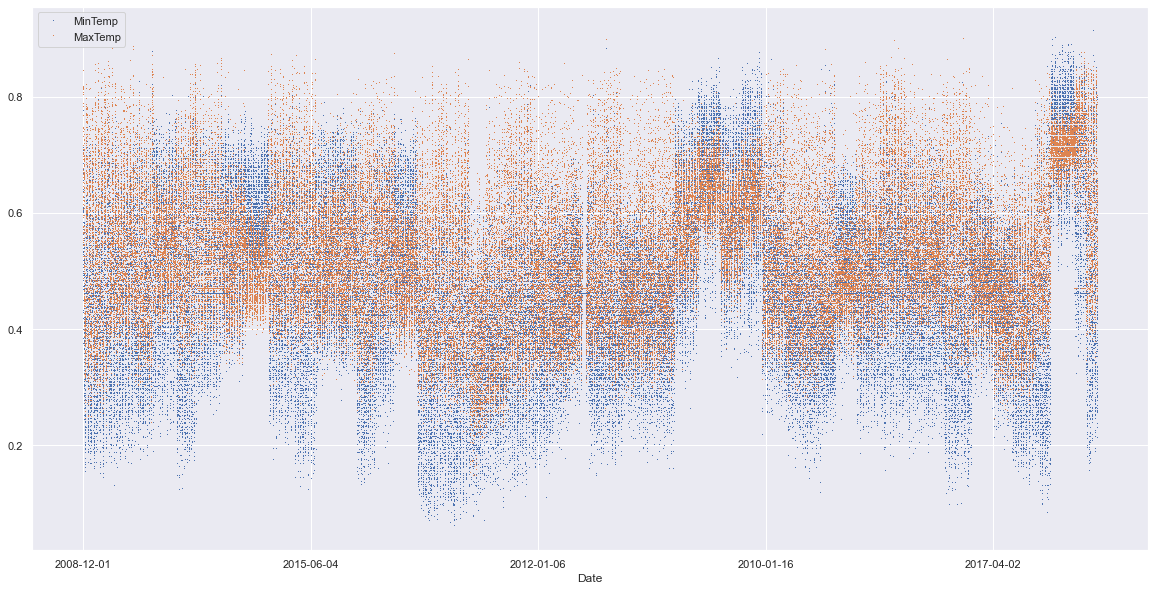

In [23]:
lines = cleaned_df[['MinTemp', 'MaxTemp']].plot.line(figsize=(20,10), style=',')

delete Pressure9am column because the high corralation with Pressure3am, and delete Temp3pm column because the high corralation with MaxTemp

In [24]:
cleaned_df = cleaned_df.drop(['Pressure9am', 'Temp3pm'], axis=1)

## Classification Model

split the data to depende and indepented variables

In [25]:
X = cleaned_df.drop('RainTomorrow',axis=1)
y = cleaned_df['RainTomorrow']

split the data to train and test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Gaussian Naïve Bayes

In [27]:
model = GaussianNB()
max_accuracy=0
feature1, feature2 = X.columns[0], X.columns[1]
for column1 in X.columns:
    for column2 in X.columns:
        if column1 != column2:
            model.fit(X_train[[column1, column2]], y_train)
            y_pred= model.predict(X_test[[column1, column2]])
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > max_accuracy:
                feature1, feature2, max_accuracy = column1, column2, accuracy 
print(f"The 2 features that yield the best results for a GNB classifier {feature1} and {feature2}")
print(f"The accuracy is {max_accuracy}")

The 2 features that yield the best results for a GNB classifier WindGustSpeed and Humidity3pm
The accuracy is 0.8684141644542497


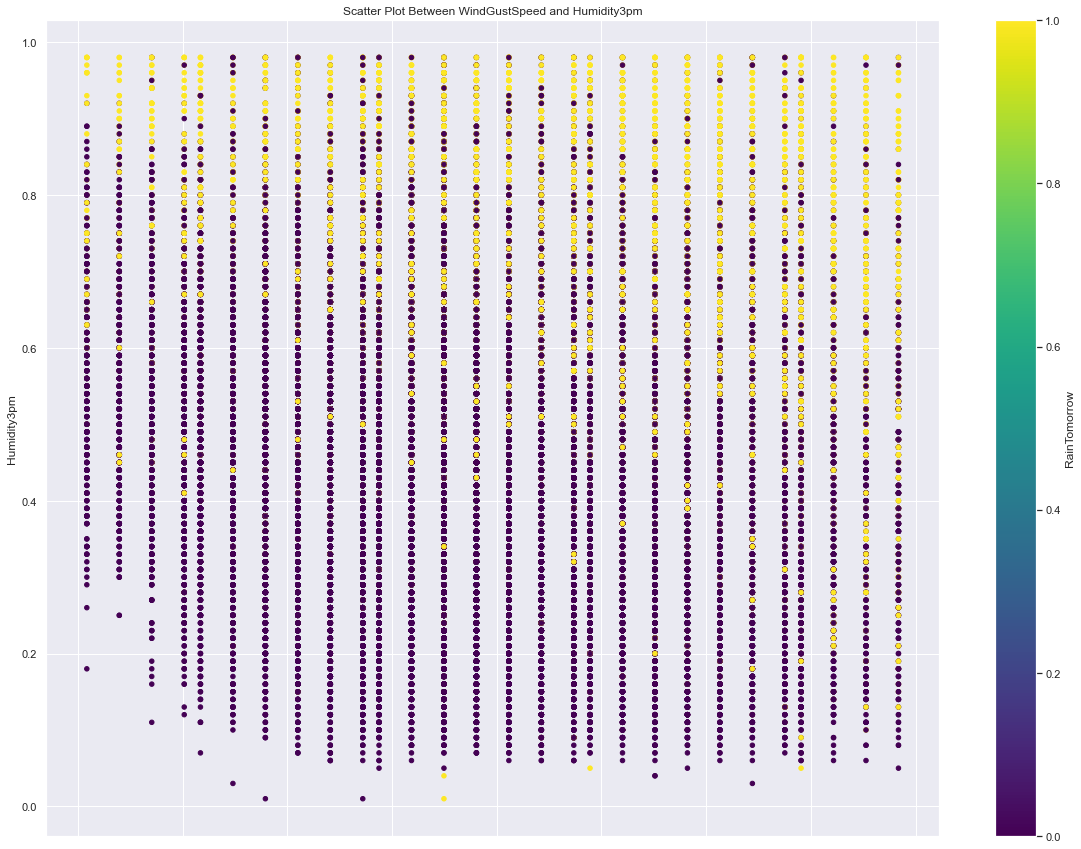

In [28]:
ax = cleaned_df.plot.scatter(x=feature1, y=feature2, c='RainTomorrow', figsize=(20,15), cmap = plt.cm.get_cmap('viridis'))
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_title(f"Scatter Plot Between {feature1} and {feature2}")
plt.show()

In [29]:
model.fit(X_train[[feature1, feature2]], y_train)
y_pred= model.predict(X_test[[feature1, feature2]])
confusion_matrix(y_test, y_pred)

array([[22425,   342],
       [ 3177,   799]], dtype=int64)

### Decision Tree

#### baseline decision tree classification report for the dataset

In [30]:
df_dropnull = df.dropna()
df_dropnull = df_dropnull.copy()
for column in df_dropnull.columns:
    if df_dropnull[column].dtype == 'object':
        df_dropnull[column] =le.fit_transform(df_dropnull[column])
        
X_dropnull = df_dropnull.drop('RainTomorrow',axis=1)
y_dropnull = df_dropnull['RainTomorrow']
X_train_dropnull, X_test_dropnull, y_train_dropnull, y_test_dropnull = train_test_split(X_dropnull, y_dropnull, test_size=0.3)

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=9)
clf = clf.fit(X_train_dropnull, y_train_dropnull)

In [32]:
y_pred_drop_null = clf.predict(X_test_dropnull)
report = classification_report(y_test_dropnull, y_pred_drop_null)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     13228
           1       0.69      0.55      0.61      3698

    accuracy                           0.85     16926
   macro avg       0.78      0.74      0.76     16926
weighted avg       0.84      0.85      0.84     16926



In [33]:
confusion_matrix(y_test_dropnull, y_pred_drop_null)

array([[12305,   923],
       [ 1675,  2023]], dtype=int64)

#### decision tree classifier based on manipulated data set, selecting the most relevant features.

In [34]:
importance_features = ['Humidity3pm', 'WindGustSpeed', 'Pressure3pm', 'Rainfall', 'Sunshine',
       'Temp9am', 'Humidity9am', 'Cloud3pm', 'WindDir3pm']
clf = tree.DecisionTreeClassifier(max_depth=9)
clf = clf.fit(X_train[importance_features], y_train)

In [35]:
y_pred = clf.predict(X_test[importance_features])
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     22767
           1       0.63      0.27      0.38      3976

    accuracy                           0.87     26743
   macro avg       0.76      0.62      0.65     26743
weighted avg       0.85      0.87      0.84     26743



In [36]:
confusion_matrix(y_test, y_pred)

array([[22144,   623],
       [ 2909,  1067]], dtype=int64)

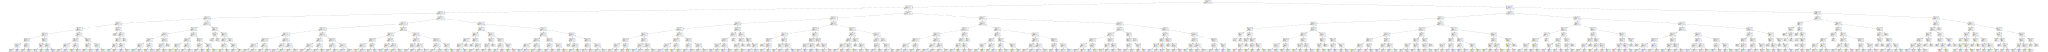

In [37]:
display(graphviz.Source(export_graphviz(clf)))
plt.show()

The accuracy is not improved by using the manipulated data set, and selecting the most relevant features.

## Summary

#### brief review of your results.

The 2 features that yield the best results for a GNB classifier are WindGustSpeed and Humidity3pm with an accuracy score of 0.84 on the test set.
We can see in the scatter plot the separation between the RainTomorrow No label and the RainTomorrow Yes label based on those two features.
We can see in the confusion matrix that the model has a high false negative rate compared to the false positive rate, so the model predicts more about No RainTomorrow when the true value is Yes, than Yes RainTomorrow when the true value is No.  


The baseline decision tree model used all the all features, without the rows containing NA values, so they used only 39 % of the data. By using the manipulated data set and selecting the most 9 relevant features the accuracy result is improved from 0.84 to 0.87.

In conclusion the decision tree model with the manipulated data set achieved better results compared to GNB classifier with the two features.